# **Exploratory Data Analysis**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [7]:
# Load the dataset
df = pd.read_csv("TSLA_stock_data.csv")

In [8]:
# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the first few rows of the dataset to understand its structure
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [9]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
# Plot the Adjusted Close price over time
fig = px.line(df, x='Date', y='Adj Close', title='Tesla Adjusted Closing Price Over Time',
              labels={'Adj Close': 'Adjusted Close Price', 'Date': 'Date'})
fig.update_layout(xaxis_title='Date', yaxis_title='Adjusted Close Price (USD)')
fig.show()


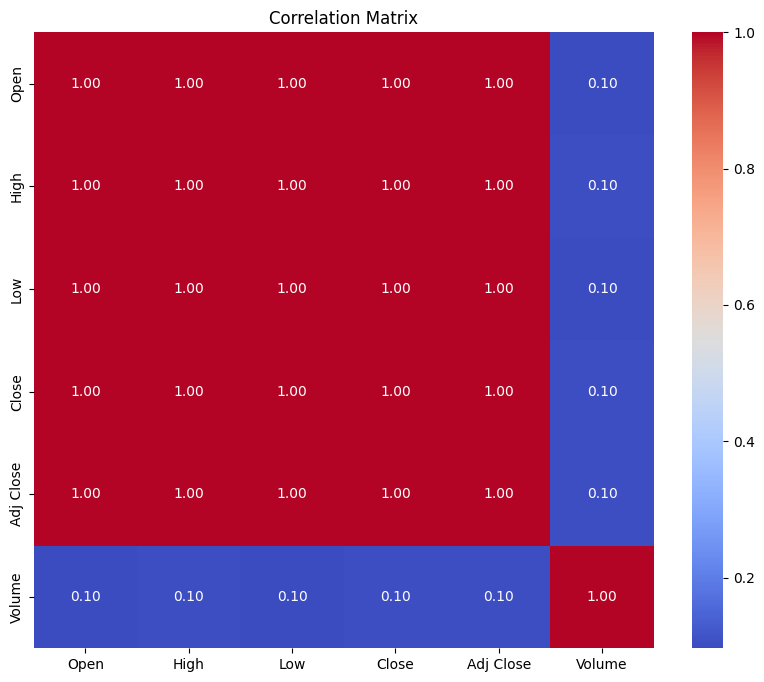

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# **Machine Learning Prediction Model**

In [12]:
# Create new features using lag values
df['Adj Close Shifted'] = df['Adj Close'].shift(-1)

# Drop rows with NaN values caused by shifting
df = df.dropna()

# Features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Adj Close Shifted']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [14]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 2.250156724602191
Mean Squared Error (MSE): 26.49123099325059
Root Mean Squared Error (RMSE): 5.14696327879368


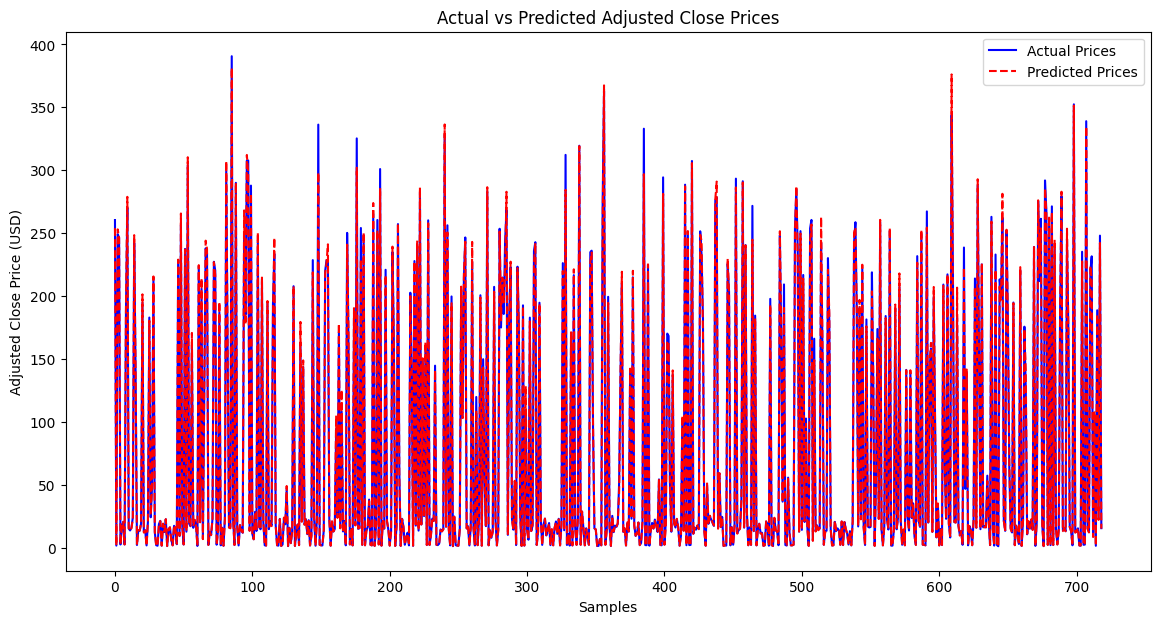

In [15]:
# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Adjusted Close Prices')
plt.xlabel('Samples')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()
